# Author : Pranshu Sharma

# Unsupervised Machine Learning ( Iris DataSet)

# Importing relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
sns.set()

# Source Of Data

### Data has been stored inside a csv file namely 'iris.csv' 

# Loading data

In [2]:
iris_data = pd.read_csv('iris.csv')
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Gaining information from data

In [3]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


##### Data Insights: 
###### 1.All columns are not having any Null Entries 
###### 2.Four columns are numerical type 
###### 3.Only Single column categorical type

# Statistical Insight

In [4]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Data Insights:  
###### 1. mean values  
###### 2 standard deviation , 
###### 3 minimum value  
###### 4 maximum value 

# Check For Duplicate Entries

In [5]:
iris_data.duplicated().sum()  # Total no of duplicated entries

3

In [6]:
iris_data[iris_data.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,setosa
37,4.9,3.1,1.5,0.1,setosa
142,5.8,2.7,5.1,1.9,virginica


#### There are 3 duplicates, therefore we must check whether each species data set is balanced in no.s or not

# Checking the balance

In [7]:
iris_data['species'].value_counts()  # Gives number of entries of all species

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

#### Therefore we shudn't delete the entries as it might imbalance the data sets and hence will prove to be less useful for valuable insights

# Data Visualization

### Species count

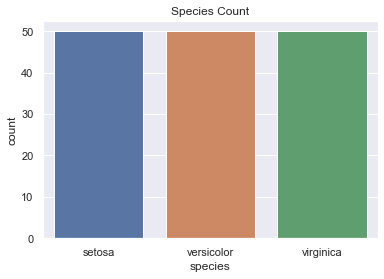

In [8]:
plt.title('Species Count')
sns.countplot(iris_data['species'])

#### Data Insight: 
##### 1.This further visualizes that species are well balanced
##### 2. Each species ( Iris virginica,setosa,versicolor) has 50 as it's count    

## Uni-variate Analysis

### Comparison between various species based on sepal length and width

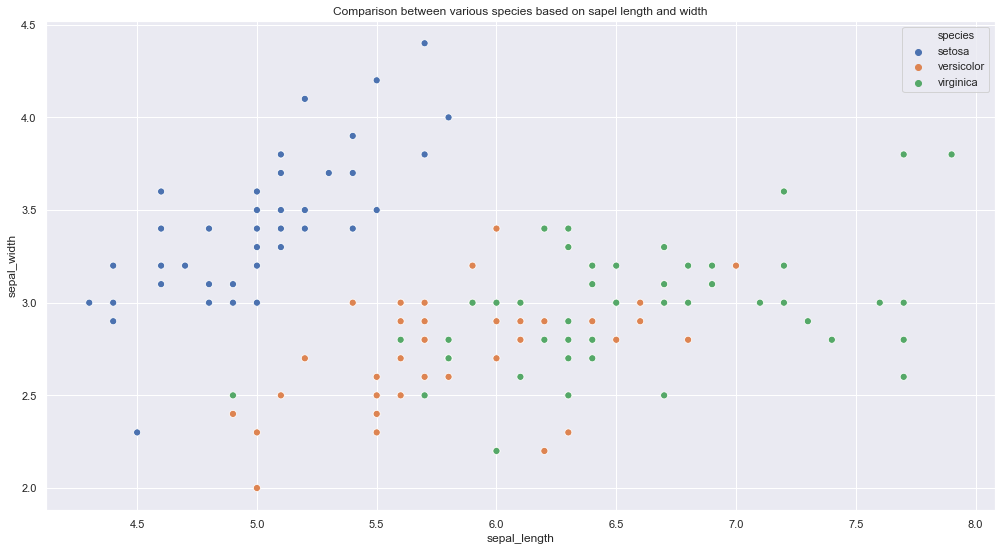

In [9]:
plt.figure(figsize=(17,9))
plt.title('Comparison between various species based on sapel length and width')
sns.scatterplot(iris_data['sepal_length'],iris_data['sepal_width'],hue =iris_data['species'],s=50)

#### Data Insights:
##### 1.iris-setosa species has smaller sepal length but higher width. 
##### 2.Versicolor lies in almost middle for length as well as width 
##### 3.Virginica has larger sepal lengths and smaller sepal widths

### Comparison between various species based on sapel lenght and width

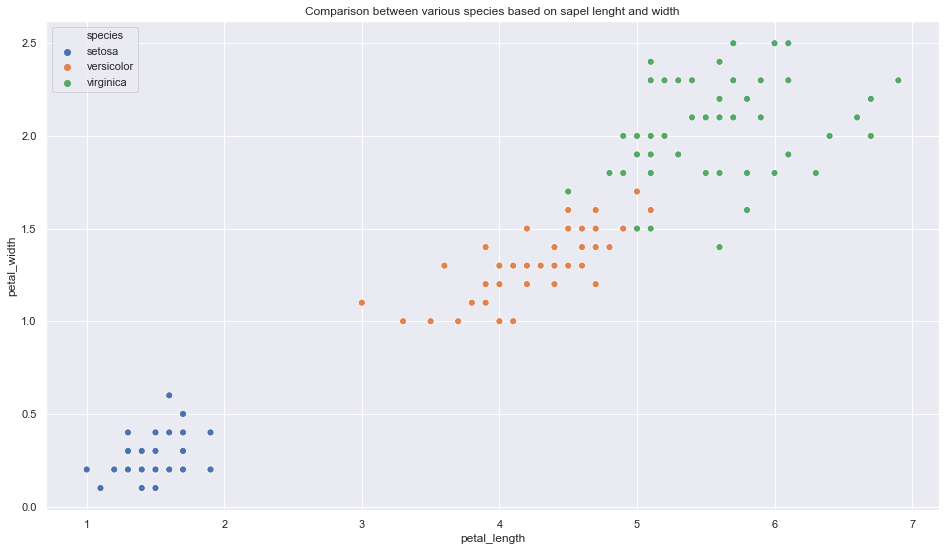

In [10]:
plt.figure(figsize=(16,9))
plt.title('Comparison between various species based on sapel lenght and width')
sns.scatterplot(iris_data['petal_length'], iris_data['petal_width'], hue = iris_data['species'], s= 50)

 #### Data Insights
 ###### 1. Setosa species have the smallest petal length as well as petal width 
 ###### 2. Versicolor species have average petal length and petal width 
 ###### 3. Virginica species have the highest petal length as well as petal width

## Bi-variate Analysis

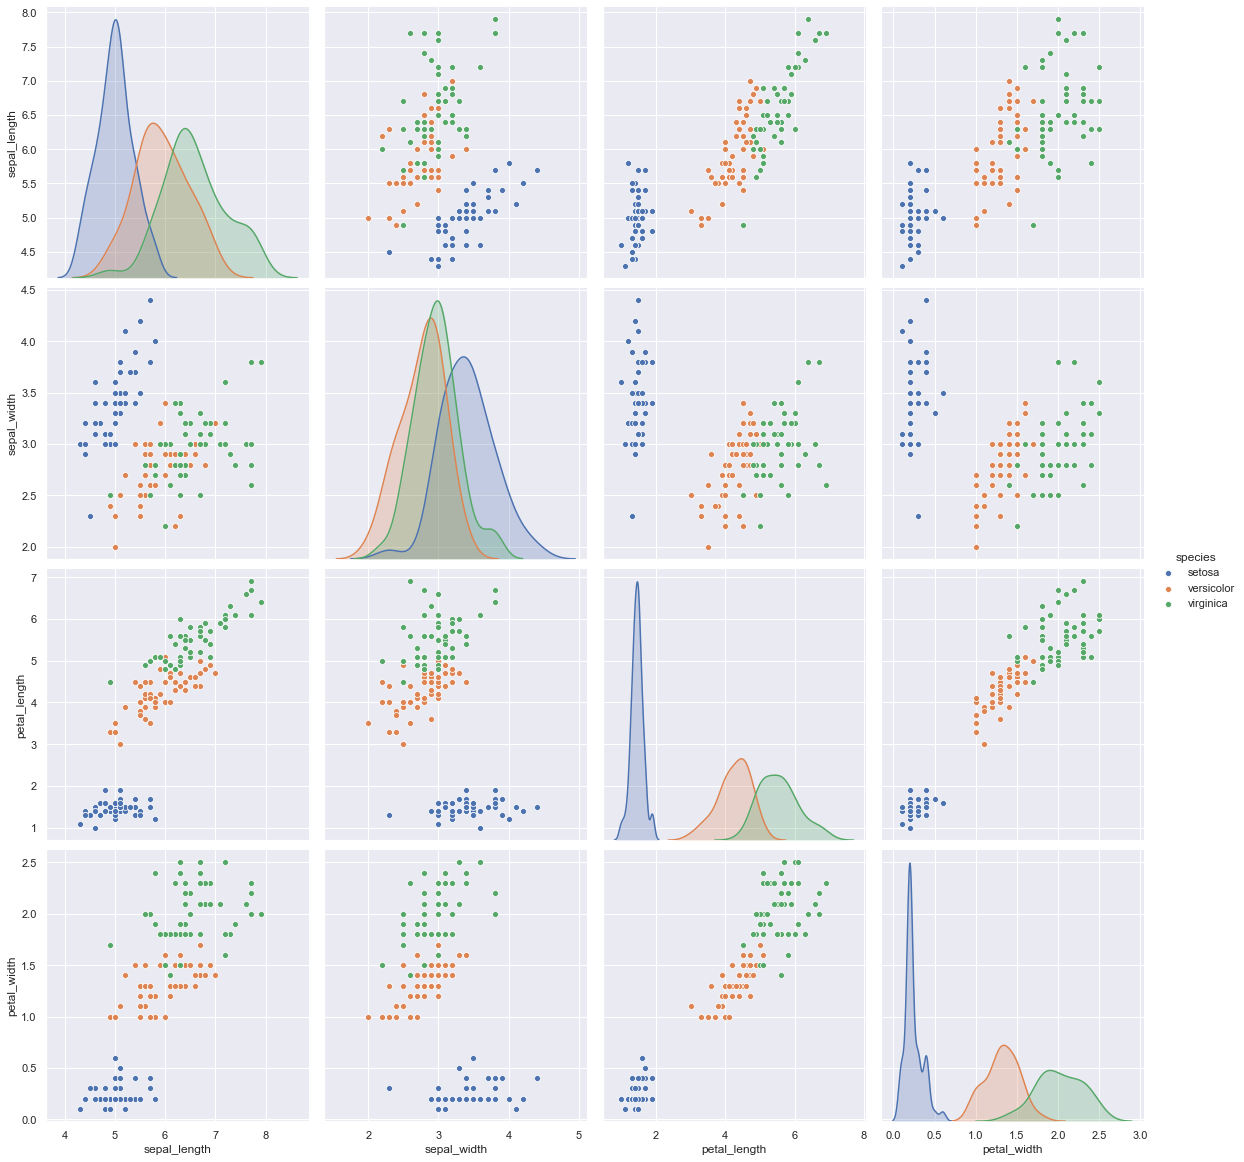

In [11]:
sns.pairplot(iris_data,hue="species",height=4)

#### Data Insights:  
##### 1. High co relation betweeen petal length and widht columns. 
##### 2.Setosa has both low petal length and width 
##### 3.Versicolor has both average petal lenth and width
##### 4.Virginica has both high petal length and width. 
##### 5. Sapel width for setosa is high and length is low. 
##### 6. Versicolor have average values for for sapel dimensions. 
##### 7.Virginica has small width but large sapel length  

## Checking Correlation

[]

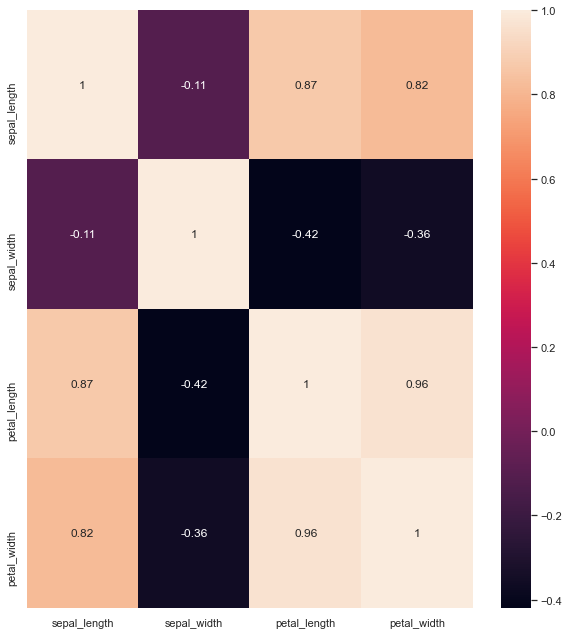

In [12]:
plt.figure(figsize=(10,11))
sns.heatmap(iris_data.corr(),annot=True)
plt.plot()

#### Data Insights:
##### 1. Sepal Length and Sepal Width features are slightly correlated with each other.


# Box plots to know about distribution

##### boxplot to see how the categorical feature “Species” is distributed with all other four input variables

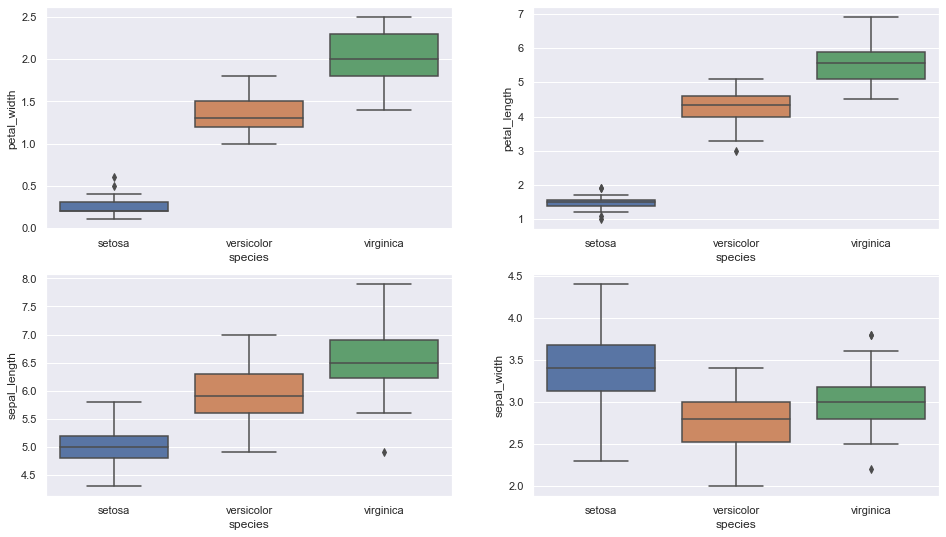

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot(  y="petal_width", x= "species", data=iris_data,  orient='v' , ax=axes[0, 0])
sns.boxplot(  y="petal_length", x= "species", data=iris_data,  orient='v' , ax=axes[0, 1])
sns.boxplot(  y="sepal_length", x= "species", data=iris_data,  orient='v' , ax=axes[1, 0])
sns.boxplot(  y="sepal_width", x= "species", data=iris_data,  orient='v' , ax=axes[1, 1])
plt.show()

#### Data Insights: 
##### 1. Setosa is having smaller feature and less distributed
##### 2. Versicolor is distributed in a average manner and average features 
##### 3. Virginica is highly distributed with large no .of values and features

# Violin Plot for checking distrubtion

#####  The violinplot shows density of the length and width in the species. The thinner part denotes that there is less density whereas the fatter part conveys higher density

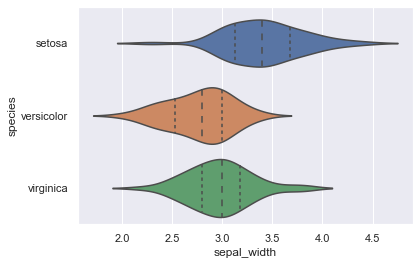

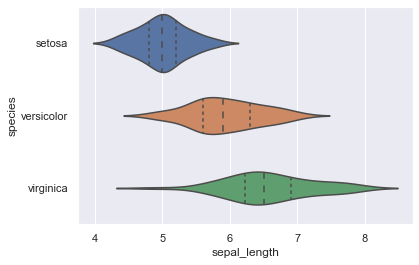

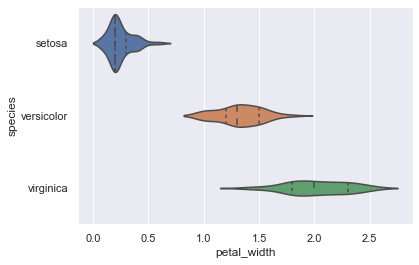

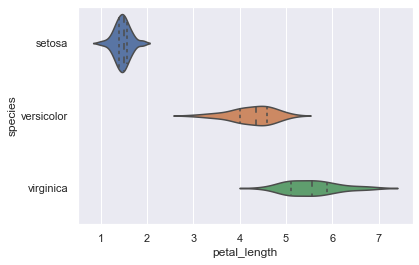

In [14]:
sns.violinplot(y='species', x='sepal_width', data=iris_data, inner='quartile')
plt.show() 
sns.violinplot(y='species', x='sepal_length', data=iris_data, inner='quartile')
plt.show() 
sns.violinplot(y='species', x='petal_width', data=iris_data, inner='quartile')
plt.show()
sns.violinplot(y='species', x='petal_length', data=iris_data, inner='quartile')
plt.show()

# Designing Machine Learning Model

## Splitting into train and test values

In [15]:
X = iris_data.drop(['species'],axis=1)
Y = iris_data['species']


In [16]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [17]:
Y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [18]:
from sklearn.model_selection import train_test_split 

In [19]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=5)

In [20]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


#####  succesfully splitting 80% data for training and 20% testing

## Using logistic  algorithm for training and prediction purposes

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9777777777777777


###### yayie!!!!!! 97 % Accuracy

# Making predictions by providing random inputd

In [23]:
pred_d1 = np.array([[2,4,3,5]])
pred_d2 = np.array([[6,3,4,2]])
pred_d3 = np.array([[3,2,4,5]])

In [24]:
print('The predicted species:-',logreg.predict(pred_d1))

The predicted species:- ['virginica']


In [25]:
print('The predicted species:-',logreg.predict(pred_d2))

The predicted species:- ['versicolor']


In [26]:
print('The predicted species:-',logreg.predict(pred_d3))

The predicted species:- ['virginica']


##### Thus the model is ready to predict